# Imports

In [30]:
import numpy as np
import pandas as pd
from sklearn import tree
import sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Input the 2019 Dataset
df = pd.read_csv('Data/2019_data.csv')

/Users/MoshaLangerak_1/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Display import
df.head(-5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Context,Local Authority District code (2019),Local Authority District name (2019),Employment Domain Score,Income Domain Score,IDACI Score,IDAOPI Score,Police Strength,Police Funding,Population
0,a8977a2a4e14252420371eb993d52e4d0b8288a7c833e6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,...,NaN,E07000224,Arun,"0,054","0,058","0,055","0,069","30,435",2572,154.414
1,NaN,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
2,934e173f2bc2e1dd3a257b37939d8f97575d3eeb89ff0c...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
3,4f5b7e424bc78b1fb8c32e07da61176d2cbc5a3849d8e1...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
4,53d960600a4a9f54b785f598af4c75bdef2f79bce1a41b...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348331,ca9365d6f6df6f218a06f1f32fb907061018f461bedad2...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.068596,50.904531,On or near Carendon Close,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348332,091eb729242fa5503d83ae27e679b1986e48ed6da90fb0...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.072551,50.903762,On or near Green Lane,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348333,0af34965867602d016c3e98b34f59c1e3c6828260ca90f...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.074427,50.905233,On or near Glasspool,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348334,8e008c4280a3ef3cdfb7046444b988dbdb1f612d989fd2...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.063798,50.902649,On or near Ashling Gardens,E01023234,Winchester 014E,Burglary,...,NaN,E07000094,Winchester,"0,064","0,091","0,093","0,142","2,697",315,119.218


In [5]:
# Drop required values that contain NAN
df.dropna(subset=['LSOA code', 'Month', 'Location', 'Crime type', 'Longitude', 'Latitude', 'Employment Domain Score',
       'Income Domain Score', 'IDACI Score', 'IDAOPI Score', 'Police Strength',
       'Police Funding', 'Population'], inplace=True)

In [6]:
df[df['Month'] == '2019-05']['Crime type'].mode()

0    Violence and sexual offences
dtype: object

In [7]:
for month in df['Month'].unique():
    print(month)
    print(df[df['Month'] == month]['Crime type'].mode())

2019-01
0    Violence and sexual offences
dtype: object
2019-02
0    Violence and sexual offences
dtype: object
2019-03
0    Violence and sexual offences
dtype: object
2019-04
0    Violence and sexual offences
dtype: object
2019-05
0    Violence and sexual offences
dtype: object
2019-06
0    Violence and sexual offences
dtype: object
2019-07
0    Violence and sexual offences
dtype: object
2019-08
0    Violence and sexual offences
dtype: object
2019-09
0    Violence and sexual offences
dtype: object
2019-10
0    Violence and sexual offences
dtype: object
2019-11
0    Violence and sexual offences
dtype: object
2019-12
0    Violence and sexual offences
dtype: object


In [8]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context',
       'Local Authority District code (2019)',
       'Local Authority District name (2019)', 'Employment Domain Score',
       'Income Domain Score', 'IDACI Score', 'IDAOPI Score', 'Police Strength',
       'Police Funding', 'Population'],
      dtype='object')

In [9]:
df.replace(to_replace=",", value=".", regex=True, inplace=True)

In [10]:
df['Population'].isnull().sum()

0

In [11]:
df['Police Strength'].isnull().sum()

0

In [12]:
df['Population'] = df['Population'].str.replace('.', '').fillna(df['Population']*1000)

In [13]:
df['Police Strength'] = df['Police Strength'].str.replace('.','')

# Crime Type Prediction

In [14]:
# Encode Desired Values to integers to use in models
ohe = LabelEncoder()
df['E LSOA code'] = ohe.fit_transform(df['LSOA code'].dropna().values)
df['E Month'] = ohe.fit_transform(df['Month'].dropna().values)
df['E Location'] = ohe.fit_transform(df['Location'].dropna().values)

In [22]:
# Create an X and Y
X = df[['E LSOA code', 'E Month', 'E Location', 'Longitude', 'Latitude', 'Employment Domain Score',
       'Income Domain Score', 'IDACI Score', 'IDAOPI Score', 'Police Strength',
       'Police Funding', 'Population']].values
Y = df['Crime type'].values

In [38]:
# Fit Decision Tree on Crime Types and split the dataset in training and data.
clf = tree.DecisionTreeClassifier(max_depth=10)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [39]:
# Predictions on Test Set
preds = clf.predict(X_test)

In [40]:
accuracy_score(y_test, preds)

0.3023001475566357

In [41]:
# Predictions in a Dataframe
df_preds = pd.DataFrame()
df_preds['y'] = y_test
df_preds['pred'] = preds

In [42]:
df_preds

,y,pred
0,Shoplifting,Violence and sexual offences
1,Robbery,Violence and sexual offences
2,Violence and sexual offences,Anti-social behaviour
3,Anti-social behaviour,Violence and sexual offences
4,Criminal damage and arson,Violence and sexual offences
...,...,...
230415,Bicycle theft,Other theft
230416,Violence and sexual offences,Anti-social behaviour
230417,Violence and sexual offences,Violence and sexual offences
230418,Shoplifting,Shoplifting


In [37]:
# Accuracy
len(df_preds.loc[df_preds['y'] == df_preds['pred']]) / len(y_test)

0.3012216821456471

In [44]:
df_preds['y'].value_counts()

Violence and sexual offences    60988
Anti-social behaviour           44148
Other theft                     21663
Vehicle crime                   20596
Criminal damage and arson       16644
Burglary                        14666
Public order                    13233
Shoplifting                     11483
Drugs                            7277
Theft from the person            6284
Robbery                          4845
Bicycle theft                    3736
Other crime                      3243
Possession of weapons            1614
Name: y, dtype: int64

In [45]:
df_preds['pred'].value_counts()

Violence and sexual offences    132062
Anti-social behaviour            66189
Other theft                      15055
Shoplifting                      11689
Theft from the person             2680
Vehicle crime                     2279
Drugs                              147
Burglary                           147
Other crime                         77
Bicycle theft                       64
Criminal damage and arson           15
Possession of weapons               15
Public order                         1
Name: pred, dtype: int64

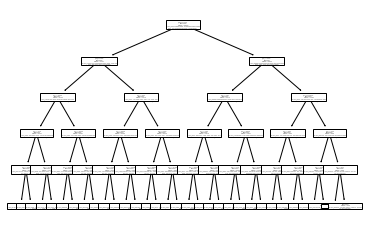

In [28]:
# Plot the Decision Tree
tree.plot_tree(clf);

# Predicting Amount of Crimes

In [ ]:
# Create a Dataframe to have the amount of crimes per LSOA per month.
df_count = df[['E LSOA code', 'Month', 'Crime type', ]].groupby(['E LSOA code','Month']).count().sort_index()

In [ ]:
# Compute past crime values
df_count['1 Month Ago'] = df_count.groupby(level=0)['Crime type'].shift(1)
df_count['2 Months Ago'] = df_count.groupby(level=0)['Crime type'].shift(2)
df_count.dropna(inplace=True)
df_count

In [ ]:
# Fit a Decision Tree on 1 month vs 2 months on all values.
X1 = df_count.reset_index()[['E LSOA code', '1 Month Ago']].values
X2 = df_count.reset_index()[['E LSOA code', '2 Months Ago']].values
y = df_count.reset_index()['Crime type'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.1, random_state=42)
clf1 = tree.DecisionTreeClassifier(max_depth=5)
clf2 = tree.DecisionTreeClassifier(max_depth=5)
clf1.fit(X1_train, y1_train)
clf2.fit(X2_train, y2_train)
preds1 = clf1.predict(X1_test)
preds2 = clf2.predict(X2_test)
df_preds1 = pd.DataFrame()
df_preds1['y'] = y1_test
df_preds1['pred'] = preds1
df_preds2 = pd.DataFrame()
df_preds2['y'] = y2_test
df_preds2['pred'] = preds2
acc1 = np.mean(abs(df_preds1['y'] - df_preds1['pred']))
acc2 = np.mean(abs(df_preds2['y'] - df_preds2['pred'])) 
acc1, acc2

In [ ]:
df_preds2

In [ ]:
# Create Dataframe
df_count = df[['Reported by','E LSOA code', 'Month', 'Crime type', ]].groupby(['Reported by','E LSOA code','Month']).count().sort_index()
df_count['1 Month Ago'] = df_count.groupby(level=1)['Crime type'].shift(1)
df_count['2 Months Ago'] = df_count.groupby(level=1)['Crime type'].shift(2)
df_count.dropna(inplace=True)
df_count

In [ ]:
# Fit a Decision Tree on 1 month vs 2 months on all values.
X1 = df_count.reset_index()[['E LSOA code', '1 Month Ago']].values
X2 = df_count.reset_index()[['E LSOA code', '2 Months Ago']].values
y = df_count.reset_index()['Crime type'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.1, random_state=42)
clf1 = tree.DecisionTreeClassifier(max_depth=5)
clf2 = tree.DecisionTreeClassifier(max_depth=5)
clf1.fit(X1_train, y1_train)
clf2.fit(X2_train, y2_train)
preds1 = clf1.predict(X1_test)
preds2 = clf2.predict(X2_test)
df_preds1 = pd.DataFrame()
df_preds1['y'] = y1_test
df_preds1['pred'] = preds1
df_preds2 = pd.DataFrame()
df_preds2['y'] = y2_test
df_preds2['pred'] = preds2
# acc1 = np.mean(abs(df_preds1['y'] - df_preds1['pred']))
# acc2 = np.mean(abs(df_preds2['y'] - df_preds2['pred'])) 
# acc1, acc2

In [ ]:
# Get all the Areas
areas = df_count.index.get_level_values(0).unique()

In [ ]:
# Fit a Decision Tree on all Areas and Compute Mean Absolute Error
MAE = []
df_results = pd.DataFrame(columns= ['Area', 'y', 'Prediction'])
for area in areas:
    df = df_count.loc[area, :]
    X2 = df.reset_index()[['E LSOA code', '2 Months Ago', '1 Month Ago']].values
    y = df.reset_index()['Crime type'].values
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.1, random_state=42)
    clf2 = tree.DecisionTreeClassifier(max_depth=5)
    clf2.fit(X2_train, y2_train)
    preds2 = clf2.predict(X2_test)
    df_preds2 = pd.DataFrame(columns= ['Area', 'y', 'Prediction'])
    df_preds2['y'] = y2_test
    df_preds2['Area'] = area
    df_preds2['Prediction'] = preds2
    df_results = df_results.append(df_preds2, ignore_index=True)
    MAE.append(np.mean(abs(df_preds2['y'] - df_preds2['Prediction'])))
MAE

In [ ]:
# Display Results
df_results.set_index(['Area','y'], inplace=True)
df_results

In [ ]:
areas[1]

In [ ]:
df_results.loc[areas[1],:]